In [290]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Загружаем необходимые библиотеки

In [291]:
df = pd.read_csv('kr3.csv', sep=',')

Импортируем наш датасет

In [292]:
df

,Age,Sex,ALP,ALT,CHE,CHOL,CREA,GGT,PROT,Category
0,32,m,52.5,7.7,6.93,3.23,106.0,12.1,69.0,0
1,32,m,70.3,18.0,11.17,4.80,74.0,15.6,76.5,0
2,32,m,74.7,36.2,8.84,5.20,86.0,33.2,79.3,0
3,32,m,52.0,30.6,7.33,4.74,80.0,33.8,75.7,0
4,32,m,74.1,32.6,9.15,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...
610,62,f,416.6,5.9,5.57,6.30,55.7,650.9,68.5,1
611,64,f,102.8,2.9,1.54,3.02,63.0,35.9,71.3,1
612,64,f,87.3,3.5,1.66,3.63,66.7,64.2,82.0,1
613,46,f,NaN,39.0,3.56,4.20,52.0,50.0,71.0,1


Построим гистограммы по числовым переменным для того, чтобы определить нужно ли логарифмировать данные. Видим, что есть смысл пролагорифмировать данные по переменным ALP, ALT, CREA, GGT.

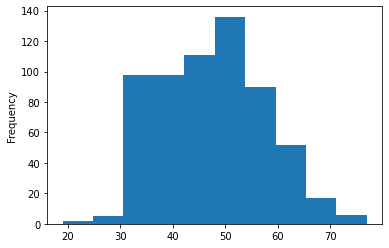

In [293]:
df['Age'].plot(kind = 'hist')

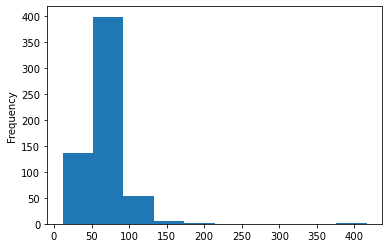

In [294]:
df['ALP'].plot(kind = 'hist')

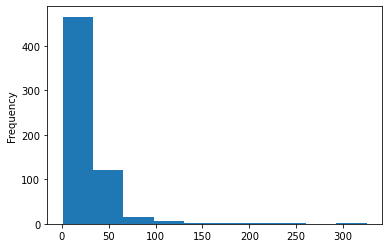

In [295]:
df['ALT'].plot(kind = 'hist')

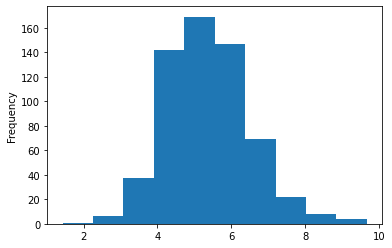

In [296]:
df['CHOL'].plot(kind = 'hist')

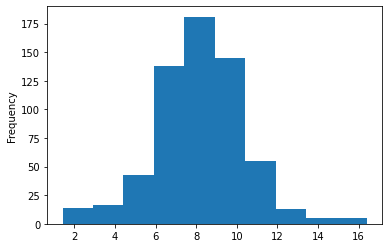

In [297]:
df['CHE'].plot(kind = 'hist')

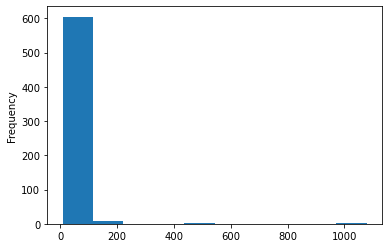

In [298]:
df['CREA'].plot(kind = 'hist')

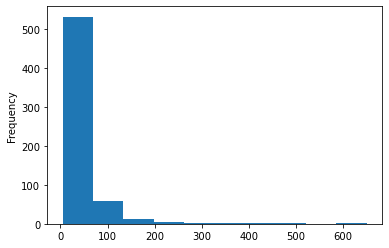

In [299]:
df['GGT'].plot(kind = 'hist')

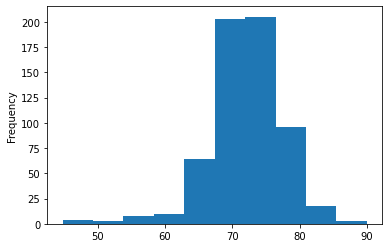

In [300]:
df['PROT'].plot(kind = 'hist')

In [301]:
df_1 = df.copy()
df_1[['ALP', 'ALT','CREA', 'GGT']] = np.log(df_1[['ALP', 'ALT','CREA', 'GGT']])

In [302]:
df_1.describe()

,Age,ALP,ALT,CHE,CHOL,CREA,GGT,PROT,Category
count,615.000000,597.000000,614.000000,615.000000,605.000000,615.000000,615.000000,614.000000,615.000000
mean,47.408130,4.166953,3.127743,8.196634,5.368099,4.346467,3.296283,72.044137,0.133333
std,10.055105,0.336048,0.660515,2.205657,1.132728,0.280440,0.767785,5.402636,0.340211
min,19.000000,2.424803,-0.105361,1.420000,1.430000,2.079442,1.504077,44.800000,0.000000
25%,39.000000,3.960813,2.797281,6.935000,4.610000,4.204693,2.753661,69.300000,0.000000
50%,47.000000,4.192680,3.135494,8.260000,5.300000,4.343805,3.148453,72.200000,0.000000
75%,54.000000,4.383276,3.498777,9.590000,6.060000,4.477337,3.693867,75.400000,0.000000
max,77.000000,6.032127,5.784748,16.410000,9.670000,6.983883,6.478356,90.000000,1.000000


Выводим статистику нашего датасета.

In [303]:
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

Проверяем и заменяем пропуски на средние значения в числовых столбцах датасета.

In [304]:
from sklearn.impute import SimpleImputer
df_1 = fill_missing_num(df_1)

In [305]:
def outliers(df_1):
    num_var = list(df_1._get_numeric_data().columns)
    for col_names in num_var:
        df_1[col_names] = df_1[col_names].apply(lambda y: df_1[col_names].mean()-3*df_1[col_names].std() 
                            if y < df_1[col_names].mean()-3*df_1[col_names].std() else y)
        df_1[col_names] = df_1[col_names].apply(lambda y: df_1[col_names].mean()+3*df_1[col_names].std() 
                            if y > df_1[col_names].mean()+3*df_1[col_names].std() else y)
    return(df_1)

Проверяем на выбросы датасет и избавляемся от них.

In [306]:
df_1

,Age,Sex,ALP,ALT,CHE,CHOL,CREA,GGT,PROT,Category
0,32.0,m,3.960813,2.041220,6.93,3.23,4.663439,2.493205,69.0,0.0
1,32.0,m,4.252772,2.890372,11.17,4.80,4.304065,2.747271,76.5,0.0
2,32.0,m,4.313480,3.589059,8.84,5.20,4.454347,3.502550,79.3,0.0
3,32.0,m,3.951244,3.421000,7.33,4.74,4.382027,3.520461,75.7,0.0
4,32.0,m,4.305416,3.484312,9.15,4.32,4.330733,3.397858,68.7,0.0
...,...,...,...,...,...,...,...,...,...,...
610,62.0,f,6.032127,1.774952,5.57,6.30,4.019980,6.478356,68.5,1.0
611,64.0,f,4.632785,1.064711,1.54,3.02,4.143135,3.580737,71.3,1.0
612,64.0,f,4.469350,1.252763,1.66,3.63,4.200205,4.162003,82.0,1.0
613,46.0,f,4.166953,3.663562,3.56,4.20,3.951244,3.912023,71.0,1.0


In [307]:
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

Производим кодирование всех качественных переменных, в нашем случае только столбец Sex.

In [308]:
df_1 = encoding_char(df_1)

In [309]:
df_1

,Age,Sex,ALP,ALT,CHE,CHOL,CREA,GGT,PROT,Category
0,32.0,0,3.960813,2.041220,6.93,3.23,4.663439,2.493205,69.0,0.0
1,32.0,0,4.252772,2.890372,11.17,4.80,4.304065,2.747271,76.5,0.0
2,32.0,0,4.313480,3.589059,8.84,5.20,4.454347,3.502550,79.3,0.0
3,32.0,0,3.951244,3.421000,7.33,4.74,4.382027,3.520461,75.7,0.0
4,32.0,0,4.305416,3.484312,9.15,4.32,4.330733,3.397858,68.7,0.0
...,...,...,...,...,...,...,...,...,...,...
610,62.0,1,6.032127,1.774952,5.57,6.30,4.019980,6.478356,68.5,1.0
611,64.0,1,4.632785,1.064711,1.54,3.02,4.143135,3.580737,71.3,1.0
612,64.0,1,4.469350,1.252763,1.66,3.63,4.200205,4.162003,82.0,1.0
613,46.0,1,4.166953,3.663562,3.56,4.20,3.951244,3.912023,71.0,1.0


Видим, что данные столбца Sex приняли значения  0; 1.

In [310]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df_1)
df_1 = sc.transform(df_1)
pd.DataFrame(df_1, columns = ['Age','Sex','ALP','ALT','CHE','CHOL','CREA','GGT','PROT','Category']).round()

,Age,Sex,ALP,ALT,CHE,CHOL,CREA,GGT,PROT,Category
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
610,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
611,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
612,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
613,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


Шкалируем наши переменные для упрощения интерпритации в диапозоне  от 0 до 1, а также чтобы не исказить кодирование качественных переменных.

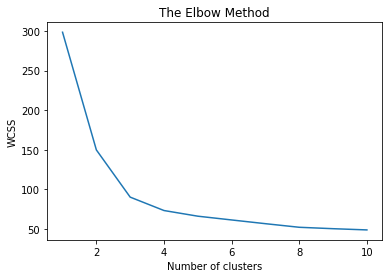

In [311]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df_1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Используем метод "локтя".

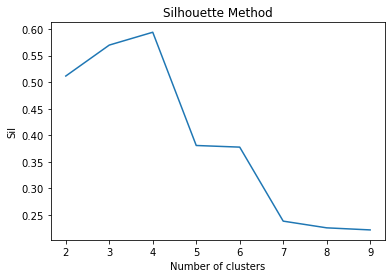

2:0.5115564802955758
3:0.5698126280072485
4:0.593979767270499
5:0.3807814021968595
6:0.37769650420892853
7:0.2383778489449688
8:0.22574189195555286
9:0.22182952424245547


In [312]:
# Применяем метод силуэта от 2 до 10 кластеров. МЫ стремимся найти максимум и как видим на 4-х кластерах значение = 0,6797733098928154.Будем использовать 4 кластера.
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters = k).fit(df_1)  
  preds = kmeans.fit_predict(df_1)
  sil.append(silhouette_score(df_1, preds, metric = 'euclidean'))


plt.plot(range(2, 10), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

Применяем метод "силуэта". Опираясь на эти 2 метода, делаем вывод, что оптимально будет использовать 4 кластера.

In [313]:
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df_1)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df_1)
pd.DataFrame(kms.cluster_centers_, columns = ['Age','Sex','ALP','ALT','CHE','CHOL','CREA','GGT','PROT','Category'])

,Age,Sex,ALP,ALT,CHE,CHOL,CREA,GGT,PROT,Category
0,0.485307,-1.720846e-15,0.492456,0.579441,0.489305,0.492989,0.480022,0.361314,0.614147,1.942890e-16
1,0.484603,1.000000e+00,0.484351,0.519322,0.430330,0.493118,0.437902,0.283142,0.589566,2.498002e-16
2,0.492402,1.665335e-16,0.431600,0.519082,0.377653,0.376062,0.458196,0.569380,0.572350,1.000000e+00
3,0.593703,1.000000e+00,0.470095,0.479716,0.331554,0.388920,0.454256,0.531063,0.646306,1.000000e+00


Используем метод К-средних и выведем ядра кластеров.

In [314]:
X = df_1[:, [0,4,5,7,9]]

Сократим количество переменных до 5.

In [315]:
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 4, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Age','CHE','CHOL','GGT','Category']).round()

,Age,CHE,CHOL,GGT,Category
0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0
2,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0


Построим функцию на 4-х кластерах и выведем ядра кластеров. Характеристика кластеров: 
Люди, которым меньше 46 лет, имеют показатели CHE меньше 9, CHOL больше 6, GGT меньше 4 - не больны. 
Люди, которым больше 46 лет, имеют показатели CHE меньше 9, CHOL меньше 6, GGT больше 4 - больны. 
Люди, которым больше 46 лет и имеют показатели CHE меньше 9, CHOL больше 6, GGT меньше 4 - больны. 
Люди, которым меньше 46 лет, имеют показатели CHE меньше 9, CHOL меньше 6, GGT меньше 4 - не больны. 

In [316]:
import pickle
obj = {'km': km}
output = open('clust.pkl', 'wb')
pickle.dump(obj, output, 4)
output.close()

Сравним резльтаты по иерархической кластеризации и метода К средних

In [317]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(df_1)
df = sc.transform(df_1)

Прошкалируем данные.

In [318]:
X = df_1[:, [0,4,5,7,9]]

In [319]:
pip install SimpSOM

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\progs\Anaconda\python.exe -m pip install --upgrade pip' command.


Инсталируем библиотеку SimpSOM

In [320]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(10, 15, X, PBC=True)
net.train(0.01, 1100)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


Обучим модель на 1100 случаях, задав размерность 10х15, желаемая функция потери 1%.

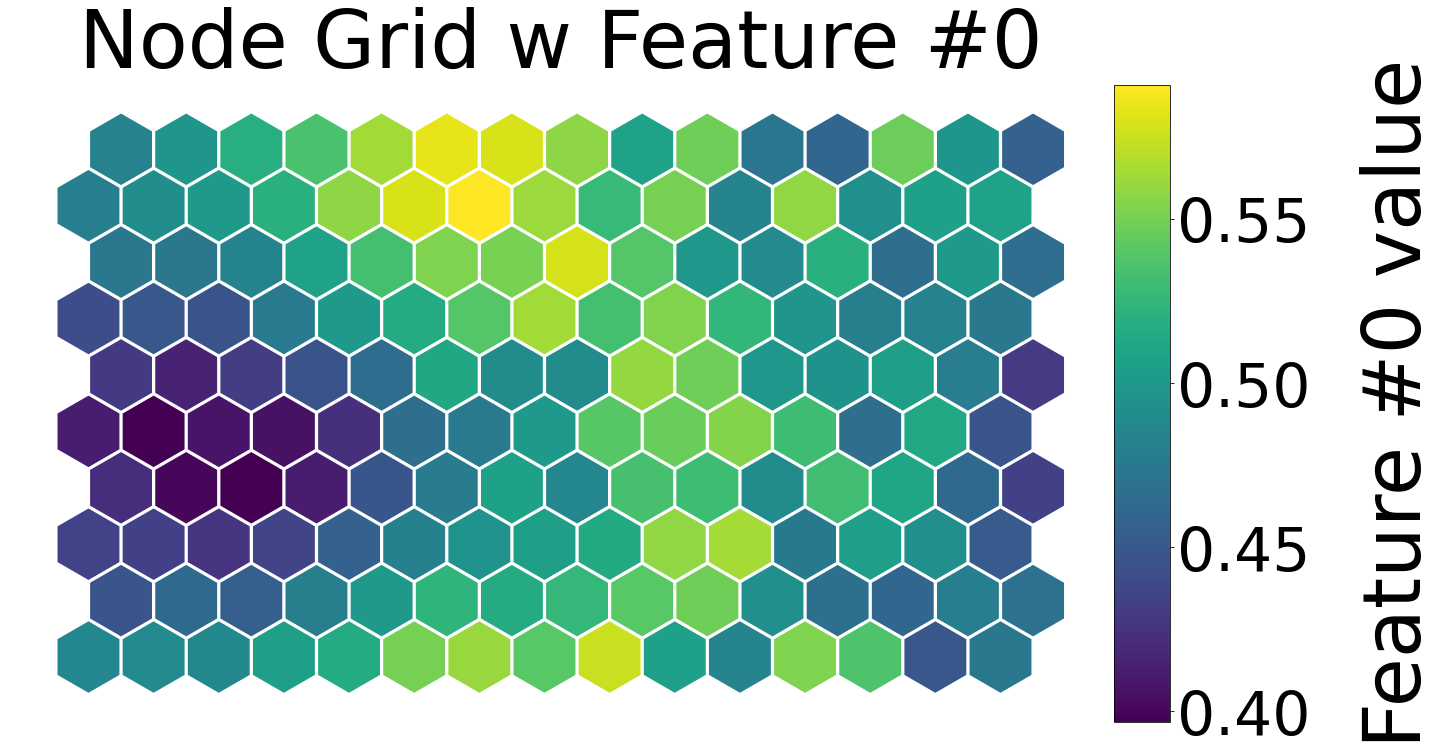

In [321]:
net.nodes_graph(colnum=0)

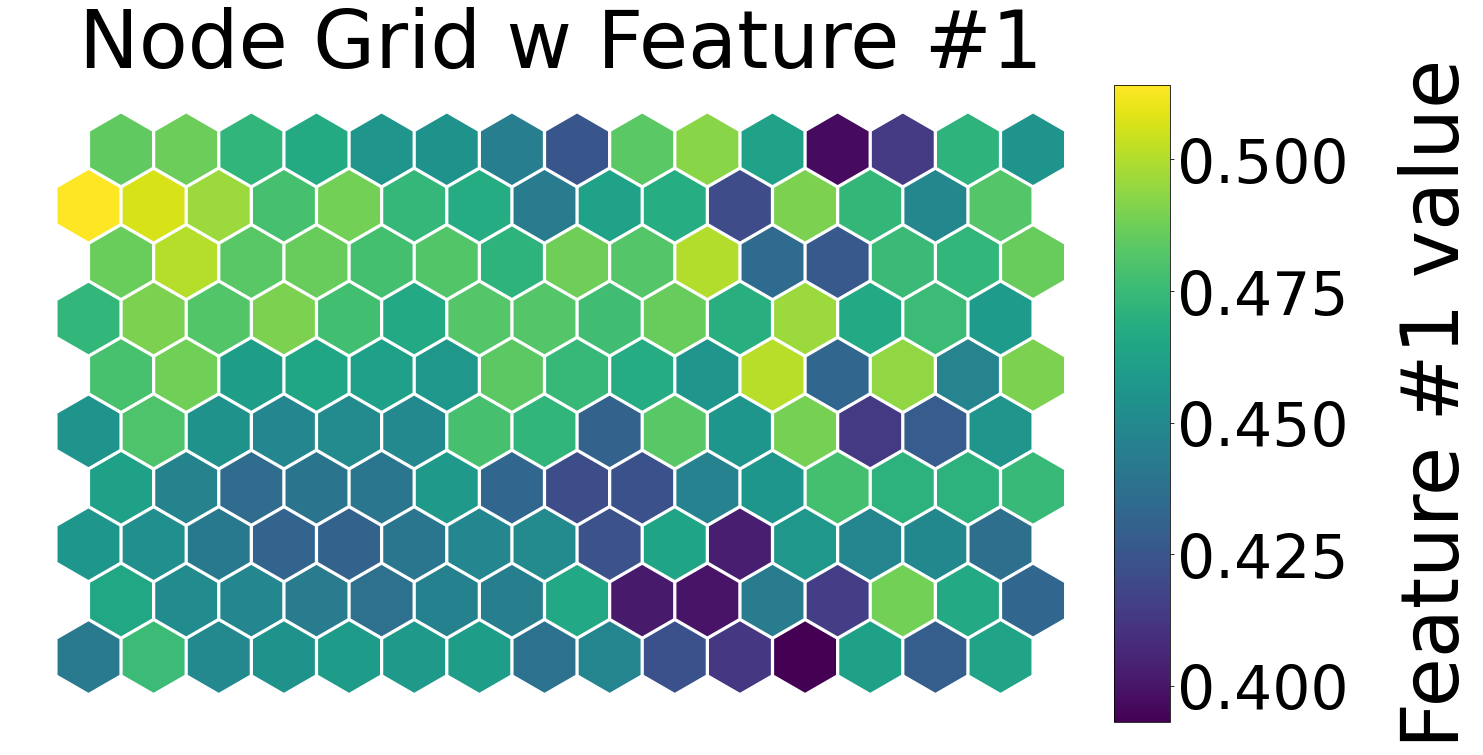

In [322]:
net.nodes_graph(colnum=1)

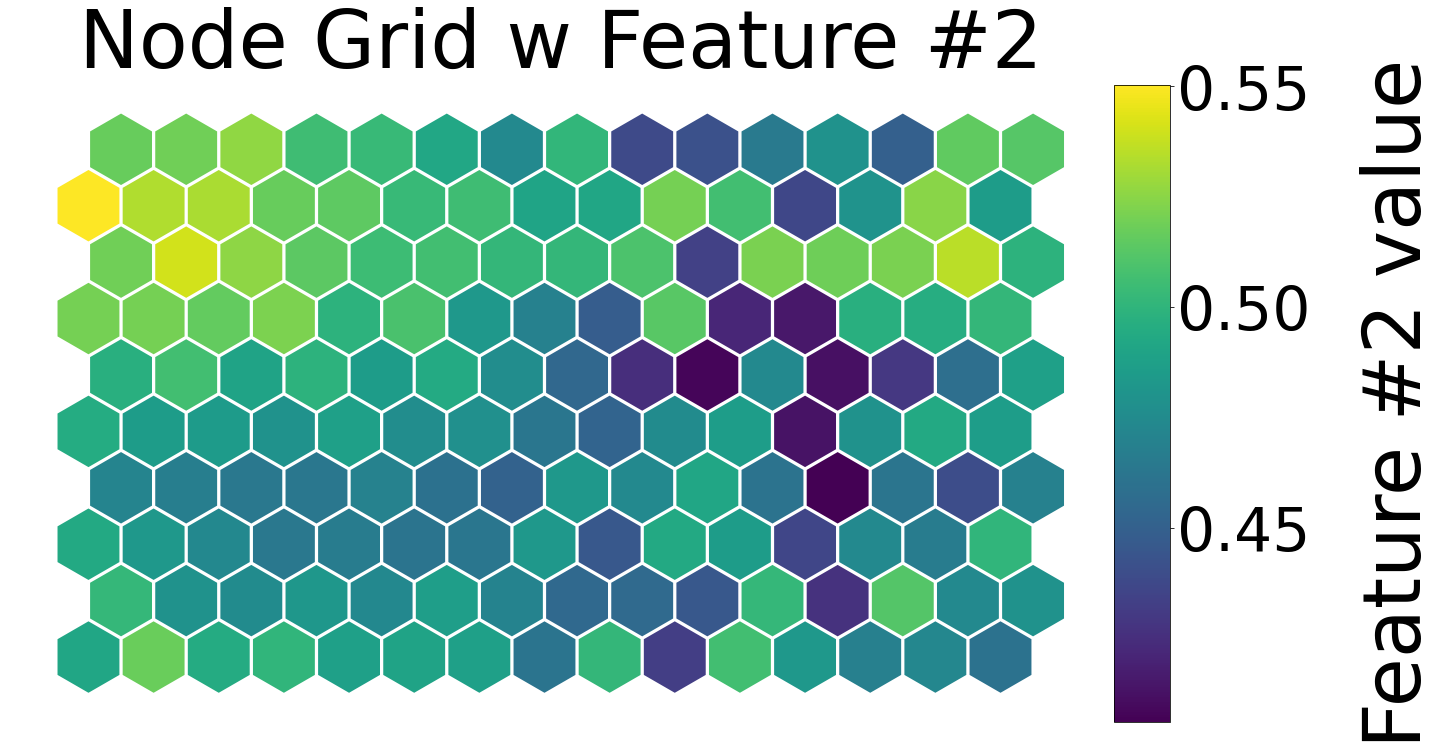

In [323]:
net.nodes_graph(colnum=2)

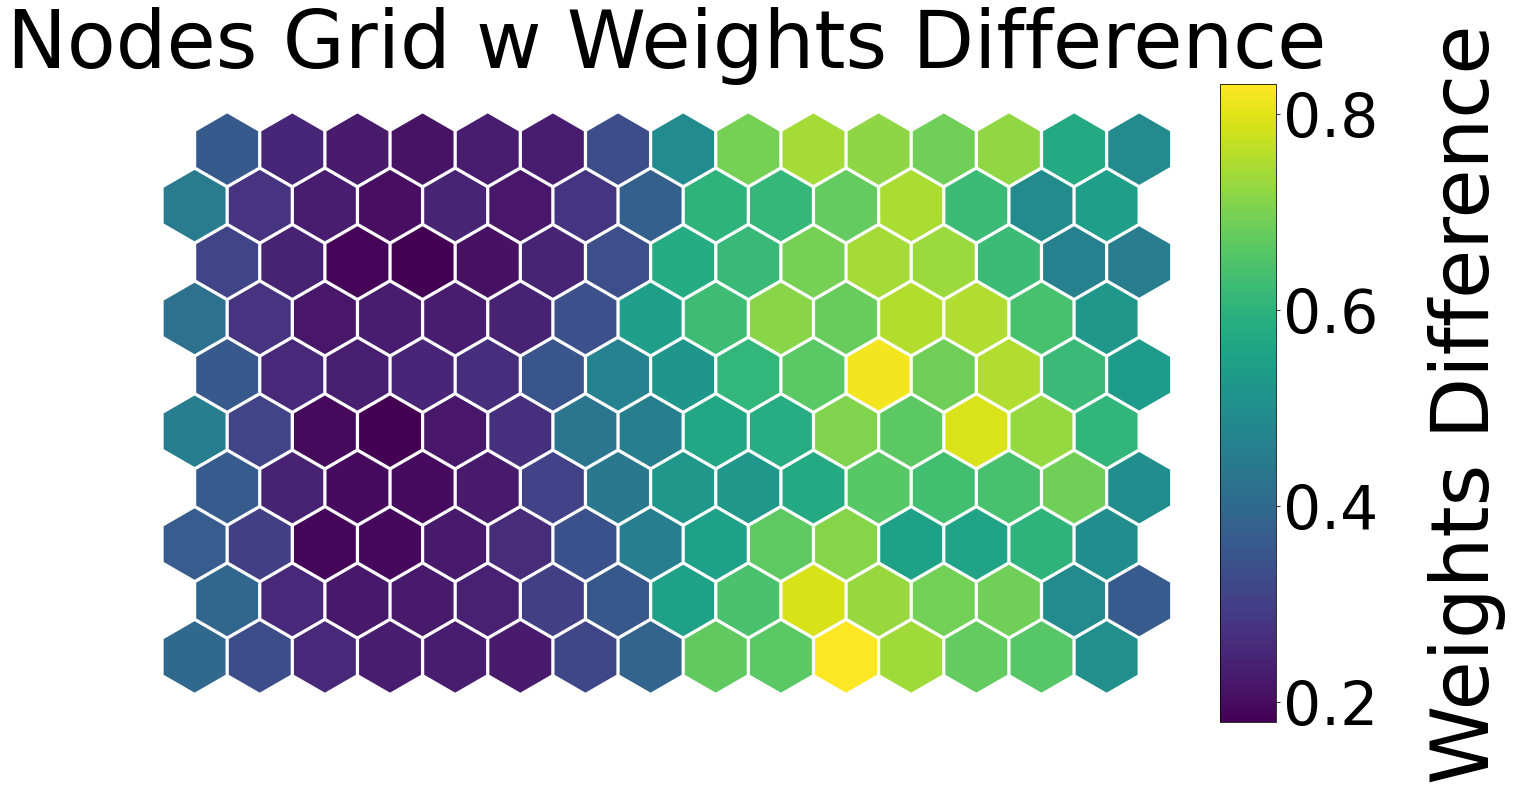

In [324]:
net.diff_graph()

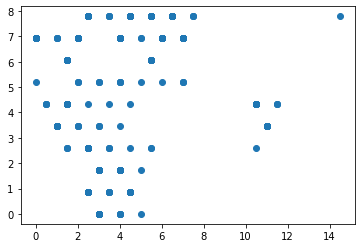

In [325]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

Визуализация наших точек на карте. В каждой точке находится некая совокупность объектов. 3 кластера выделяются очевидно.

In [329]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(prj)

In [327]:
# Importing km clusters
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
km = obj["km"]

In [328]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km,kmeans.labels_)

0.7525411906815457

Как видим из результатов кластеризации 75% пациентов были определены верно.